---

# KDDCUP99

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

from time import time
from tqdm import tqdm

from sklearn.metrics import roc_auc_score, average_precision_score,auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

import pandas as pd
import os
import sys

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')

from load_data import get_KDDCUP99
from model_ganomaly import GANomaly

In [2]:
def meanAUC_PRAUC(auc_list, pr_list, name):
    print('AUC:')
    print(auc_list)
    print('**************')
    print('PR AUC:')
    print(pr_list)
    print('**************')
    
    
    AUC_Frame = pd.DataFrame(auc_list, columns = [name])
    PR_AUC_Frame = pd.DataFrame(pr_list, columns = [name])
    
    AUC_Frame.to_csv(f'./auc/{name}.csv', index=False)
    PR_AUC_Frame.to_csv(f'./auc_PR/{name}.csv', index=False)
    
    AUC_Frame = list(AUC_Frame[name])

    N = len(AUC_Frame)
    mean_auc = np.mean(AUC_Frame)
    std_auc = np.std(AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')
    print('**************')
    
    PR_AUC_Frame = list(PR_AUC_Frame[name])

    N = len(PR_AUC_Frame)
    mean_auc = np.mean(PR_AUC_Frame)
    std_auc = np.std(PR_AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('PR AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')

In [3]:
batch_size = 1024

WORK_SPACE = '../Dataset'
FILE = 'kddcup.data_10_percent_corrected'

DATASET = 'KDDCUP99'

PATH = os.path.join(WORK_SPACE, FILE)

In [4]:
dataset = get_KDDCUP99(PATH, seed, show=True)

97278 normal records, 396743 anormal records
We use 198372 anomalous records
-----------------------------------------------------------------------------------------
There are 77822 records in training set
Training set is composed by 77822 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 14783 records in validation set
Validation set is composed by 4864 normal records and 9919 abnormal records
-----------------------------------------------------------------------------------------
There are 44348 records in test set
Test set is composed by 14592 normal records and 29756 abnormal records


In [5]:
args = {}
nc = dataset['x_train'].shape[1]
nz = 100
manualseed = -1
print_freq = 100
args['w_adv'] = 1
args['w_con'] = 50
args['w_enc'] = 1
isTrain = True 

#### Mean AUC and standard deviation after seven runs

Iteration: 1
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.030 | g_loss: 0.1222
[INFO] Training phase... Elapsed time: 437 seconds



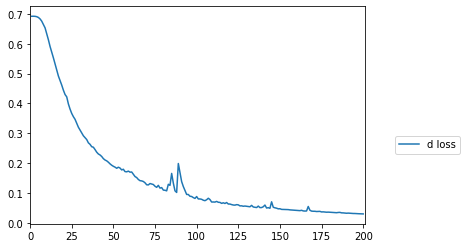

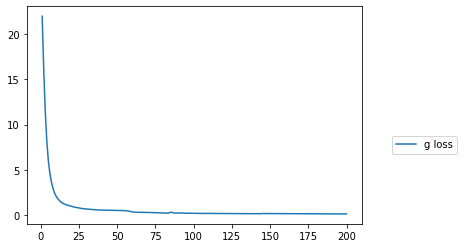

PR AUC: 1.00


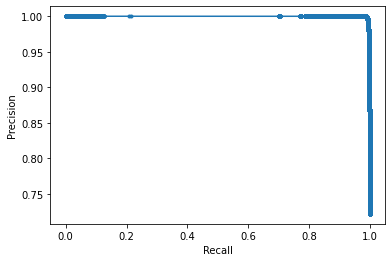

AUC: 1.00
Iteration: 2
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.030 | g_loss: 0.1244
[INFO] Training phase... Elapsed time: 448 seconds



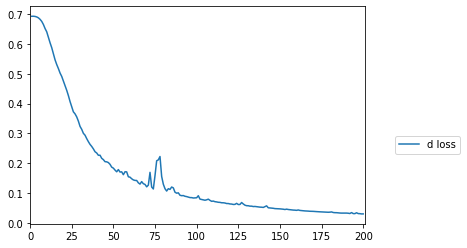

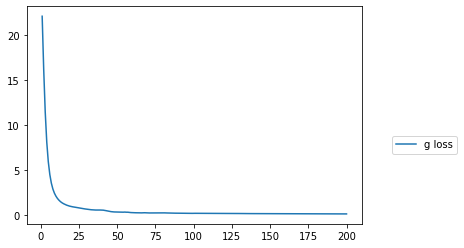

PR AUC: 1.00


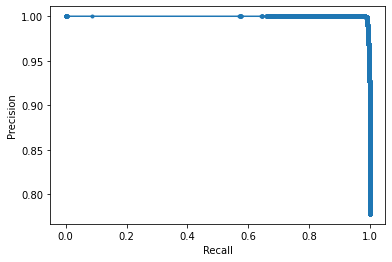

AUC: 1.00
Iteration: 3
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.024 | g_loss: 0.1481
[INFO] Training phase... Elapsed time: 441 seconds



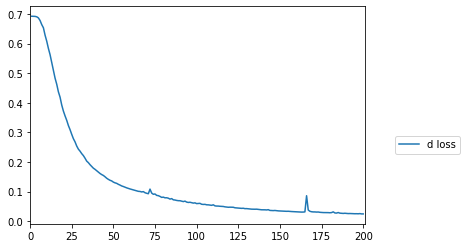

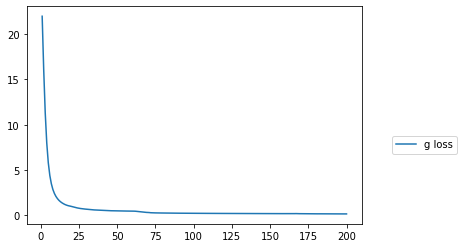

PR AUC: 1.00


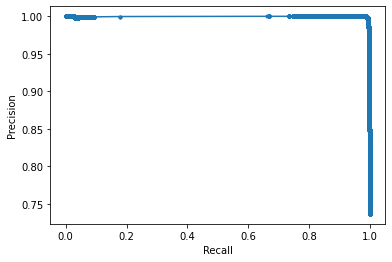

AUC: 1.00
Iteration: 4
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.057 | g_loss: 0.1499
[INFO] Training phase... Elapsed time: 444 seconds



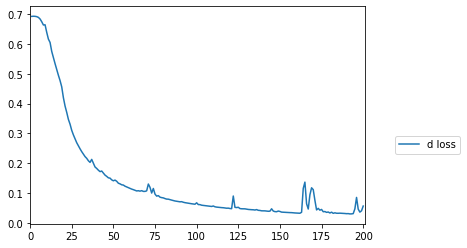

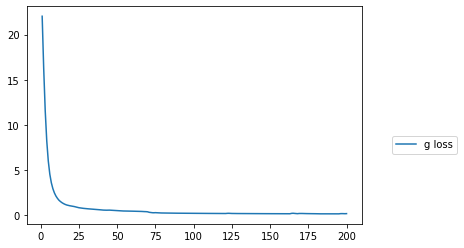

PR AUC: 1.00


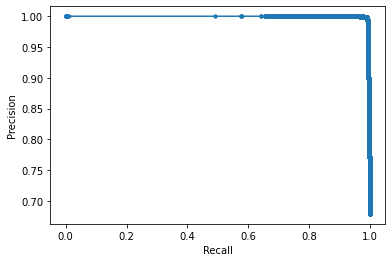

AUC: 1.00
Iteration: 5
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.022 | g_loss: 0.1189
[INFO] Training phase... Elapsed time: 445 seconds



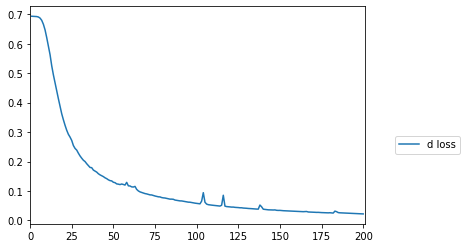

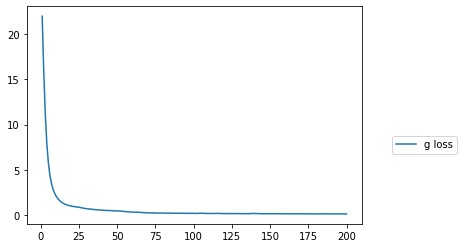

PR AUC: 1.00


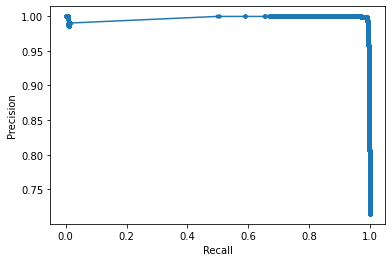

AUC: 1.00
Iteration: 6
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.021 | g_loss: 0.1393
[INFO] Training phase... Elapsed time: 439 seconds



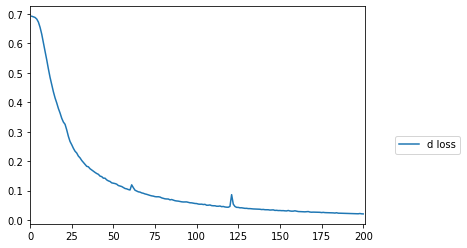

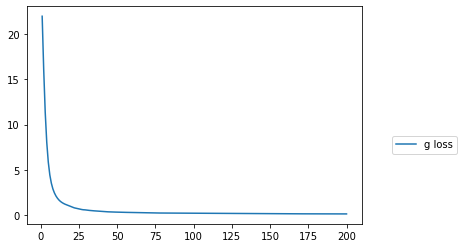

PR AUC: 1.00


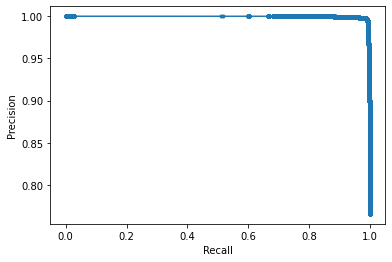

AUC: 1.00
Iteration: 7
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.025 | g_loss: 0.1253
[INFO] Training phase... Elapsed time: 447 seconds



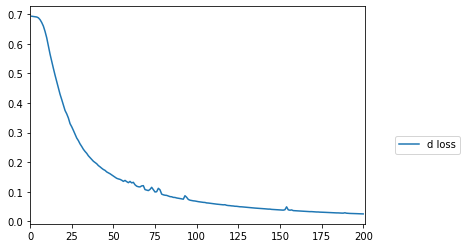

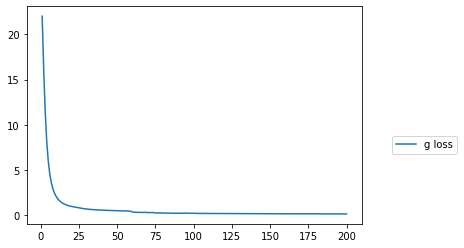

PR AUC: 1.00


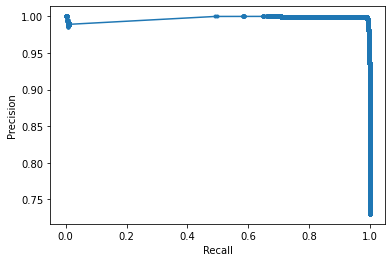

AUC: 1.00
Iteration: 8
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.035 | g_loss: 0.1138
[INFO] Training phase... Elapsed time: 446 seconds



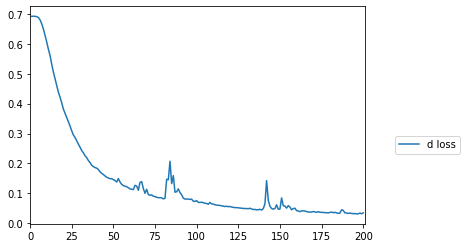

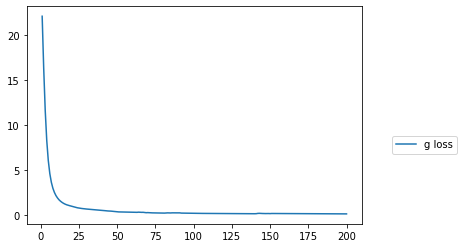

PR AUC: 1.00


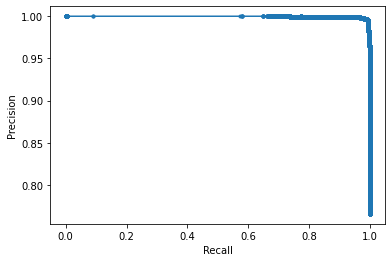

AUC: 1.00
Iteration: 9
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.073 | g_loss: 0.1590
[INFO] Training phase... Elapsed time: 431 seconds



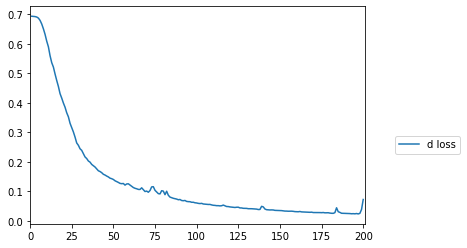

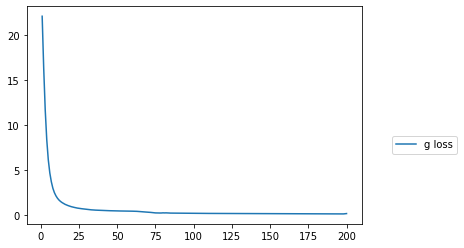

PR AUC: 1.00


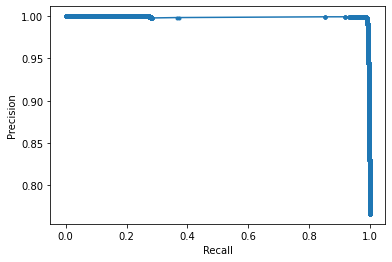

AUC: 1.00
Iteration: 11
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1251
[INFO] Training phase... Elapsed time: 446 seconds



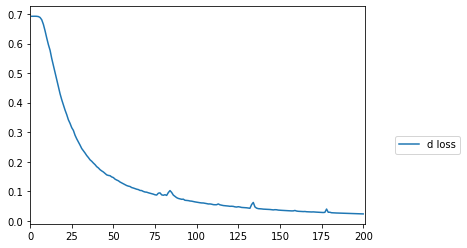

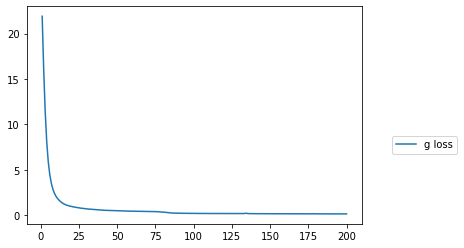

PR AUC: 1.00


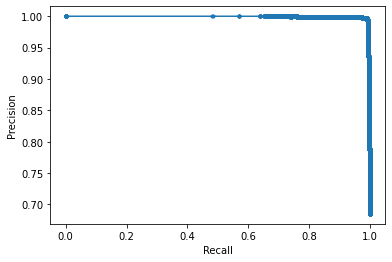

AUC: 1.00
Iteration: 12
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.022 | g_loss: 0.1470
[INFO] Training phase... Elapsed time: 447 seconds



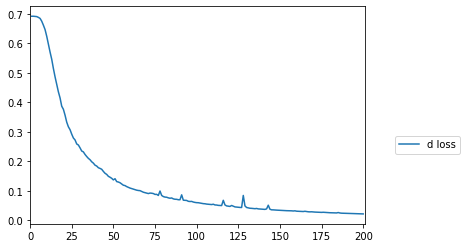

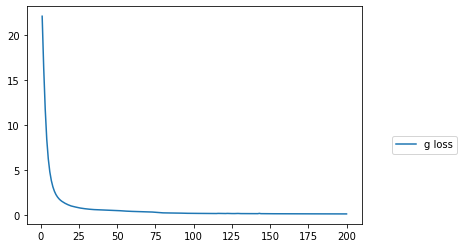

PR AUC: 1.00


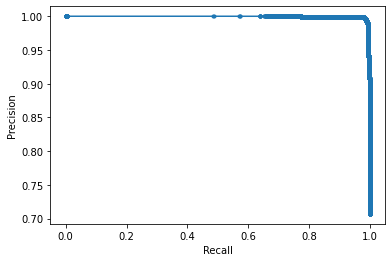

AUC: 1.00
Iteration: 13
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1357
[INFO] Training phase... Elapsed time: 446 seconds



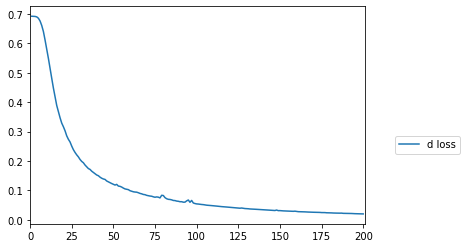

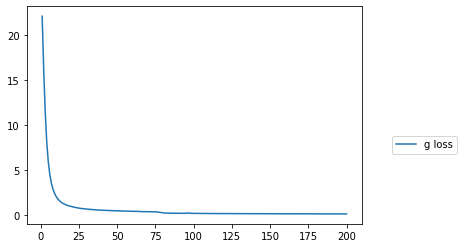

PR AUC: 1.00


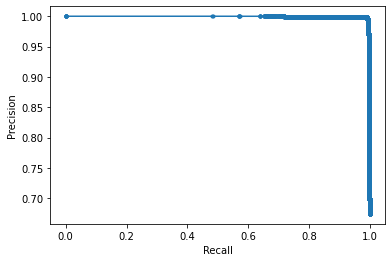

AUC: 1.00
Iteration: 14
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.025 | g_loss: 0.1127
[INFO] Training phase... Elapsed time: 452 seconds



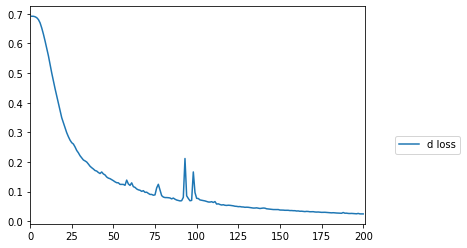

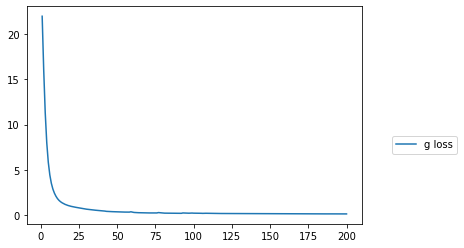

PR AUC: 1.00


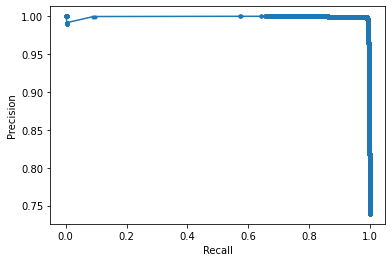

AUC: 1.00
Iteration: 15
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.025 | g_loss: 0.1265
[INFO] Training phase... Elapsed time: 447 seconds



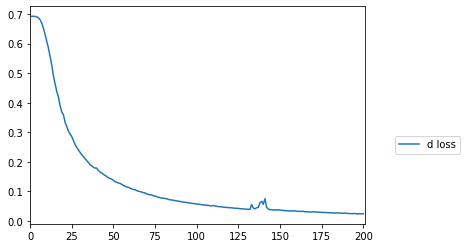

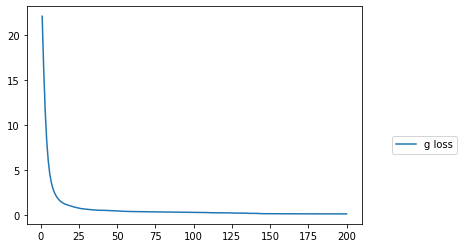

PR AUC: 1.00


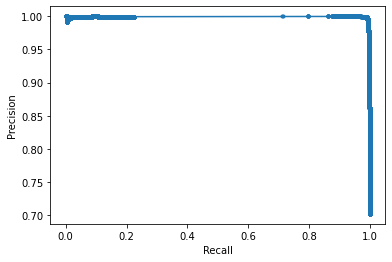

AUC: 1.00
Iteration: 16
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1589
[INFO] Training phase... Elapsed time: 438 seconds



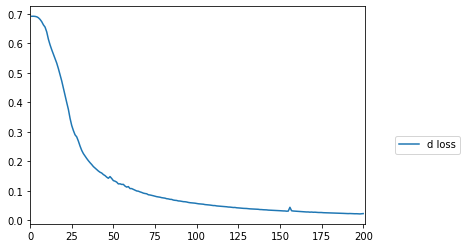

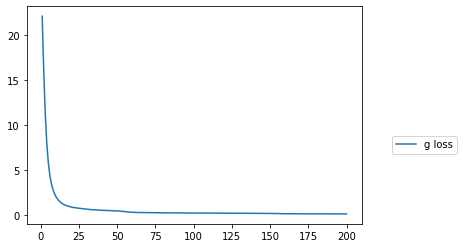

PR AUC: 1.00


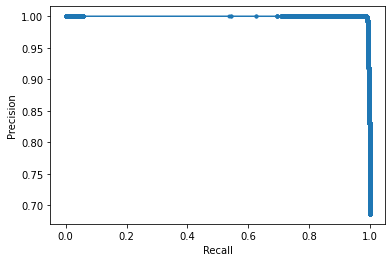

AUC: 1.00
Iteration: 17
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.045 | g_loss: 0.1231
[INFO] Training phase... Elapsed time: 447 seconds



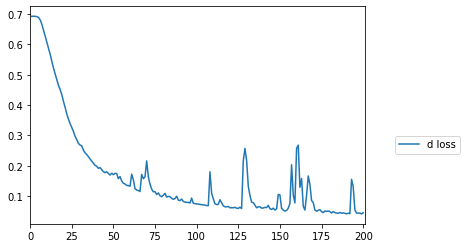

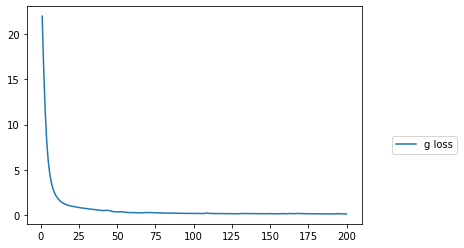

PR AUC: 1.00


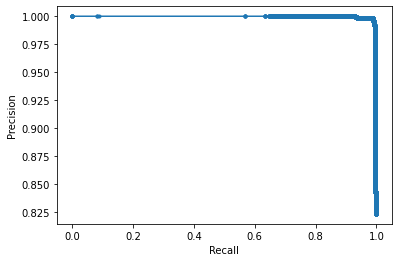

AUC: 1.00
Iteration: 18
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.022 | g_loss: 0.1265
[INFO] Training phase... Elapsed time: 439 seconds



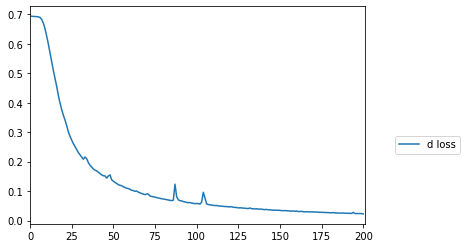

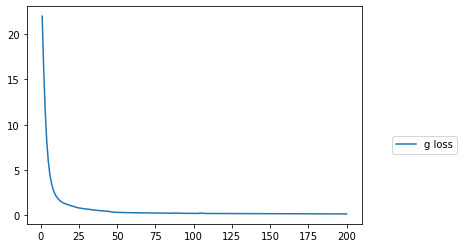

PR AUC: 1.00


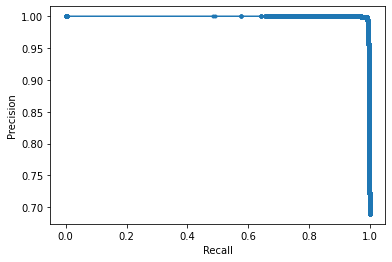

AUC: 1.00
Iteration: 19
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1190
[INFO] Training phase... Elapsed time: 446 seconds



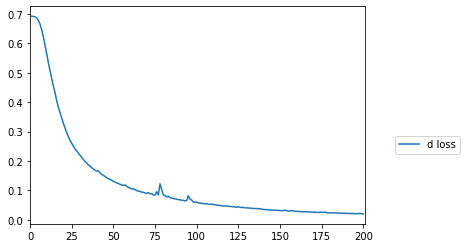

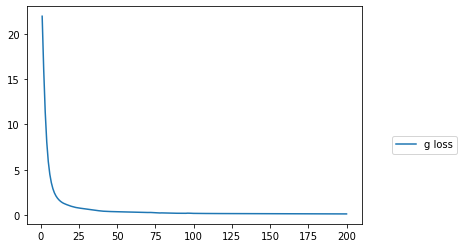

PR AUC: 1.00


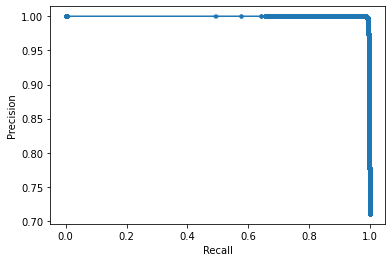

AUC: 1.00
Iteration: 20
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.026 | g_loss: 0.1270
[INFO] Training phase... Elapsed time: 447 seconds



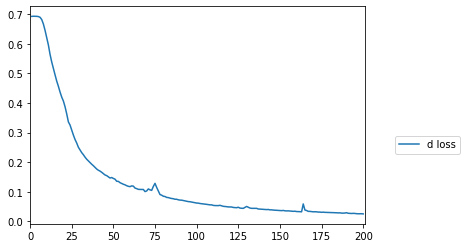

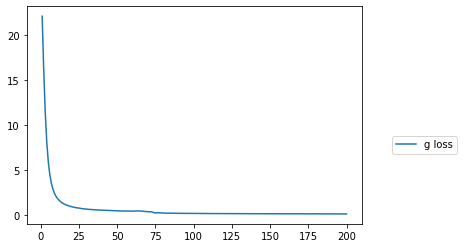

PR AUC: 1.00


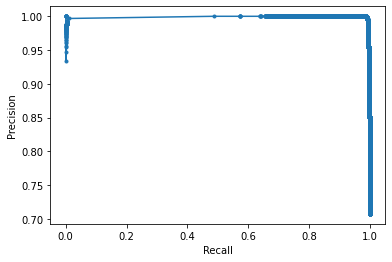

AUC: 1.00


In [6]:
n_runs = 20
auc_list = []
n_epochs = 200
seed = 42
pr_list = []

for i in range(n_runs):
    print(f'Iteration: {i+1}')
    dataset = get_KDDCUP99(PATH, seed*(i+1), show=False)
    
    # Convert Normal Label in 0 and Anomalous in 1
    dataset['y_test'].replace({1:0, 0:1}, inplace = True)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_train']).to(device), 
                                              torch.tensor(dataset['y_train'].to_numpy()).to(device))
    
    train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_val']).to(device), 
                                              torch.tensor(dataset['y_val'].to_numpy()).to(device))
    val_loader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=False)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_test']).to(device), 
                                              torch.tensor(dataset['y_test'].to_numpy()).to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)
    
    ganomaly = GANomaly(nc, nz, device)
    
    _auc, pr_auc = ganomaly.train_and_test(train_loader, test_loader, args, n_epochs, batch_size)
    
    print(f'AUC: {_auc:.2f}')
    auc_list.append(_auc)
    pr_list.append(pr_auc)

In [7]:
meanAUC_PRAUC(auc_list, pr_list, 'GANomaly_KDDCUP99')

AUC:
[0.9987688587020929, 0.9988595428122413, 0.9982341805824801, 0.9967732486283173, 0.9972921621070673, 0.9985150145894209, 0.9988332806939424, 0.9991797112678734, 0.9967644231931405, 0.9971588455254785, 0.9967183245734901, 0.9983199729326299, 0.9963053439539247, 0.9978302188575265, 0.9982826813234483, 0.9978360710054348, 0.9982388903984867, 0.9967798308552837, 0.9975555179752926, 0.9981427399077555]
**************
PR AUC:
[0.9994703847818409, 0.9994834773299676, 0.999064199880534, 0.9987278108687181, 0.9964442666663307, 0.9993223628090226, 0.9967373792146874, 0.99959651395873, 0.998004387221199, 0.998371811748811, 0.9986620936439182, 0.999229514916421, 0.9985919041297264, 0.9986122941734082, 0.9989600058210025, 0.9991151532861318, 0.9992454658807756, 0.9987876726386014, 0.9990416435435616, 0.9983084736309209]
**************
AUC
1.00 +/- 0.00
95% confidence level, average auc would be between 1.00 and 1.00
**************
PR AUC
1.00 +/- 0.00
95% confidence level, average auc would be

---